# Objective: To understand the importance of scaling on PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Task 0: Write the function to compute the pca using Eigenvector approach

In [9]:
from numpy.linalg import svd 
def pca(X):
    U, S, P_trans = svd(X, full_matrices = False)
    Sigma = np.diag(S)
    T = np.dot(U,Sigma)
    P = P_trans.T
    return T, Sigma, P #Score, Variace, Loadings

In [10]:
features, target = load_wine(return_X_y=True)
X=features
y=target

# Three different ways of scaling
* Scaling by removing the mean and divising by the standard deviation 
        #standard_scaling=preprocessing.StandardScaler()
        #X_standard=standard_scaling.fit_transform(X)
* Scaling to min and maximum values of each feature
        #minmax_scaling=preprocessing.MinMaxScaler()
        #X_minmax=minmax_scaling.fit_transform(X)
* Scaling by diving by the maximumabsolute values of each features
        #max_abs_scaler=preprocessing.MaxAbsScaler()
        #X_maxabs=max_abs_scaler.fit_transform(X)

## Task 1: Create the scores plot without any scaling

(178, 13)


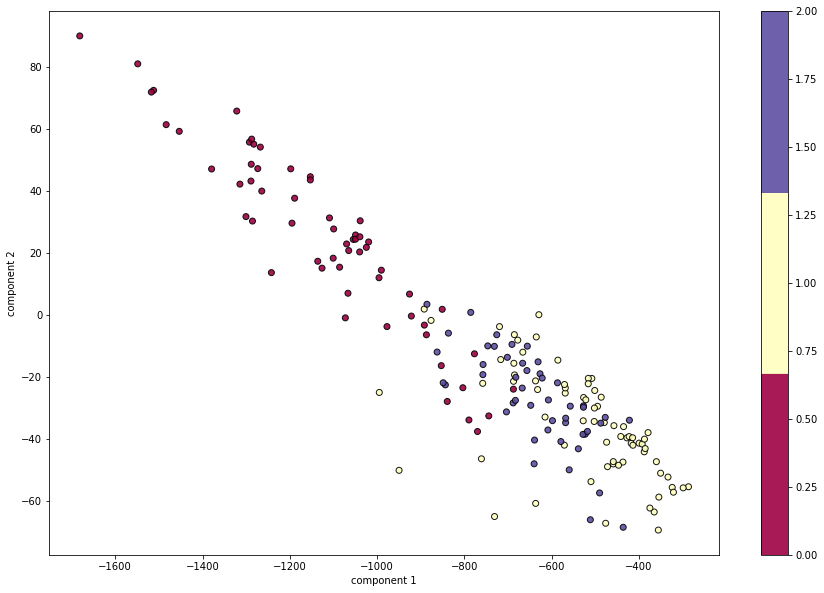

In [13]:
T,S,P=pca(X)
plt.figure(figsize=(15,10))
print(T.shape)
plt.scatter(T[:, 0], T[:, 1],
            c=y, edgecolor = 'black', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 2: Create the scores plot with standard scaling

(178, 13)


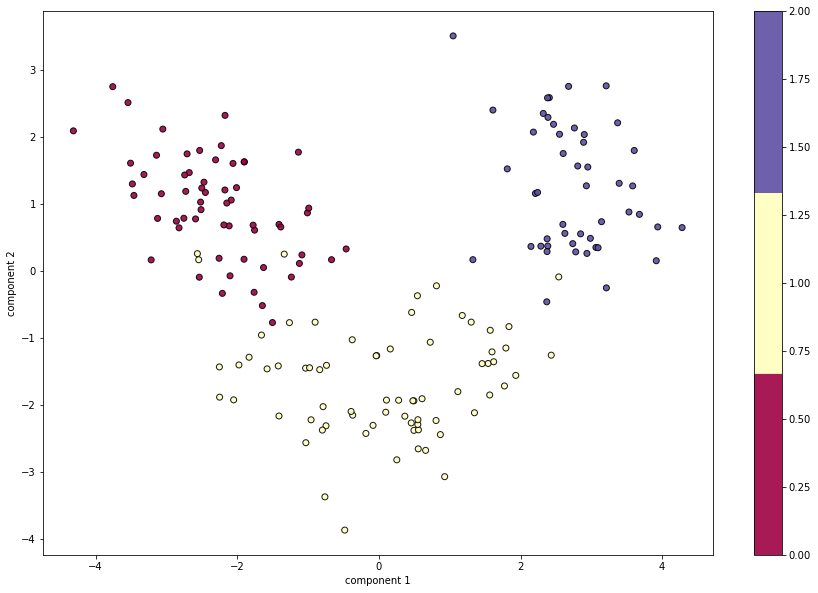

In [16]:
# Standard scaling removes mean and scales to unit variance. I.e. out = (x - mean) / variance

standard_scaling=preprocessing.StandardScaler()
X_standard=standard_scaling.fit_transform(X)

T,S,P=pca(X_standard)

plt.figure(figsize=(15,10))
print(T.shape)
plt.scatter(T[:, 0], T[:, 1],
            c=y, edgecolor='black', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 3: Create the scores plot with min max scaling

1680.0


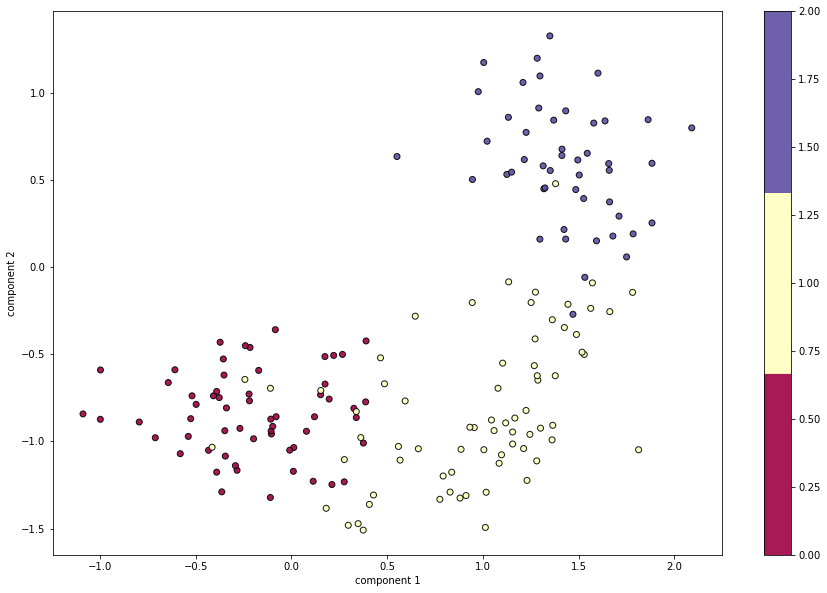

In [25]:
# Min Max scaling transformes the features to fit within a given range [min, max]. The transform is given by:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
print(np.max(X))
minmax_scaling=preprocessing.MinMaxScaler((-1,1))
X_minmax=minmax_scaling.fit_transform(X)
T,S,P=pca(X_minmax)

plt.figure(figsize=(15,10))
plt.scatter(T[:, 0], T[:, 1],
            c=y, edgecolor='black', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 4: Create the scores plot with max abs scaling

(178, 13)


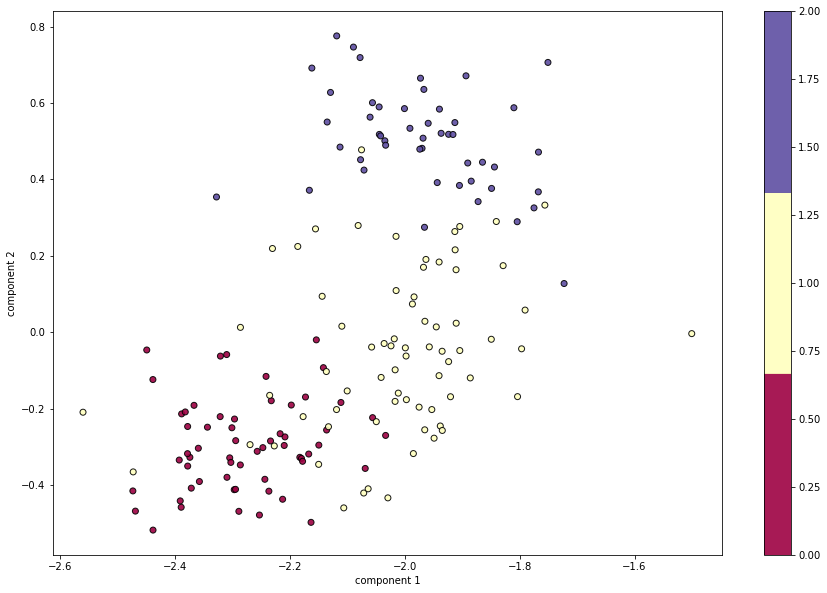

In [26]:
# Max abs scaling scales each feature so that they have maximal absolute value of 1.

max_abs_scaler=preprocessing.MaxAbsScaler()
X_maxabs=max_abs_scaler.fit_transform(X)

T,S,P=pca(X_maxabs)

plt.figure(figsize=(15,10))
print(T.shape)
plt.scatter(T[:, 0], T[:, 1],
            c=y, edgecolor='black', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();